# Loading the Libraries to be used 

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler

In [2]:
%matplotlib inline 
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

# We can start Loading the Dataset and begin the data exploration

In [3]:
df = pd.read_csv("telco.csv")

In [4]:
df.head()

,"customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn"
0,"7590-VHVEG,Female,0,Yes,No,1,No,No phone servi..."
1,"5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Y..."
2,"3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,N..."
3,"7795-CFOCW,Male,0,No,No,45,No,No phone service..."
4,"9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic..."


The CSV looks to be all in one column with a comma seperating the values.To create a dataframe in we load it and split it by commas.

In [5]:
# Read the CSV file and split by semicolons
file_path = 'telco.csv'
data = []
with open(file_path, 'r') as file:
    for line in file:
        split_line = line.strip().split(',')
        data.append(split_line)

# Convert the data into a DataFrame
df = pd.DataFrame(data)

#removing the strings on column names and anything which has a double quote
df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)

#converting the first row as column name and resetting the index 
df.columns = df.iloc[0]
df = df[1:]
df = df.reset_index(drop=True)

Now let us view the DataFrame and see how the data looks like after the exceuted code.

In [6]:
df.head()

,ï»¿customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


Now that we can see what the first five rows of data looks like we can begin exploring the meta data and see what the data means

In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ï»¿customerID     7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   object
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   object
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [9]:
df.describe()

,ï»¿customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,73,2,3,3,3,...,3,3,3,3,3,2,4,1585,6531,2
top,7590-VHVEG,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,,No
freq,1,3555,5901,3641,4933,613,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,61,11,5174


we can see there are non-numeric data types but we have numeric values in our dataframe. We need to convert them and also we can see we have unique figures, we should make our dataframe a numeric and convert the catergorical data into binary. 

In [10]:
df.isnull().sum()

0
ï»¿customerID       0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We do not have any missing values or Null Values 

# Visualisations 

converting the object data into numeric values

In [27]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce', downcast='integer')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce', downcast='float')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce', downcast='float')
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce', downcast='integer')

In [28]:
df.dtypes

gender                                       int64
SeniorCitizen                                 int8
Partner                                      int64
Dependents                                   int64
tenure                                        int8
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float32
TotalCharges                               float32
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

The next stage would be start visualisations and see if we have a class imbalance

In [13]:
df1 = df['Churn'].value_counts()
print(df1)

No     5174
Yes    1869
Name: Churn, dtype: int64


It seems like our data is skewed towards the having less people who churned and more who did not churn. This is a real world is always going to be imbalanced and skewed towards non churners. Let us see how this looks like in a histogram.

In [14]:
churn_p = df['Churn']
#churn_p.plot(kind='hist', title='"Visualisation of the Churn Probability"',xlabel='Churn Probability')
churn_p.plot(kind='hist')

TypeError: no numeric data to plot

(array([5174.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1869.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

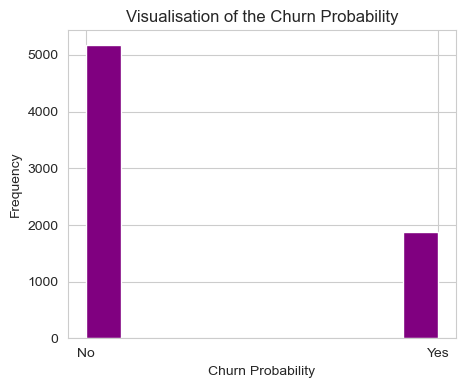

In [15]:
plt.xlabel("Churn Probability")
plt.ylabel("Frequency")
plt.title("Visualisation of the Churn Probability")
plt.hist(df['Churn'], color = 'purple')

#### We can see the histogram is showing us how data is imbalanced, lets use the pie chart to see the proportion in percentages

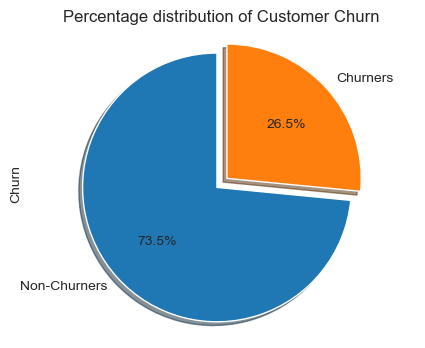

In [16]:
explode = (0, 0.1)
counts = df['Churn'].value_counts(dropna=False)
counts.plot.pie(autopct='%1.1f%%', labels=['Non-Churners', 'Churners'], explode=explode, startangle=90, shadow=True)
plt.title('Percentage distribution of Customer Churn')
plt.savefig('telco_pie_chart.png') #saving the plot for use in our documentation
plt.axis('equal')
plt.show()

Our data is imbalanced that leaves us to conduct a literature review on the best way to deal with such data. We must convert our data now into binary categories and visualise and drop columns that will not help as well as find potential predictors. 

#### We will start by dropping Customer ID. It is not a predictor and can only be helpful in identifying the customers. 

In [17]:
df = df.drop(df.columns[0], axis=1)

In [18]:
#We want to replace these to just a "No" So that we can reduce all "No" to change them to 0
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [19]:
#converting all the yes and no to a one or zero
def convert_cat(df):
    cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    for col in cols:
        df[col].replace({'Yes': 1,'No': 0},inplace=True)
        
convert_cat(df)
    

In [20]:
#Pandas does not have the spread function so it has the pivot and one-hot-encoding which is easy to use
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])


In [21]:
df.head()
#df.shape

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


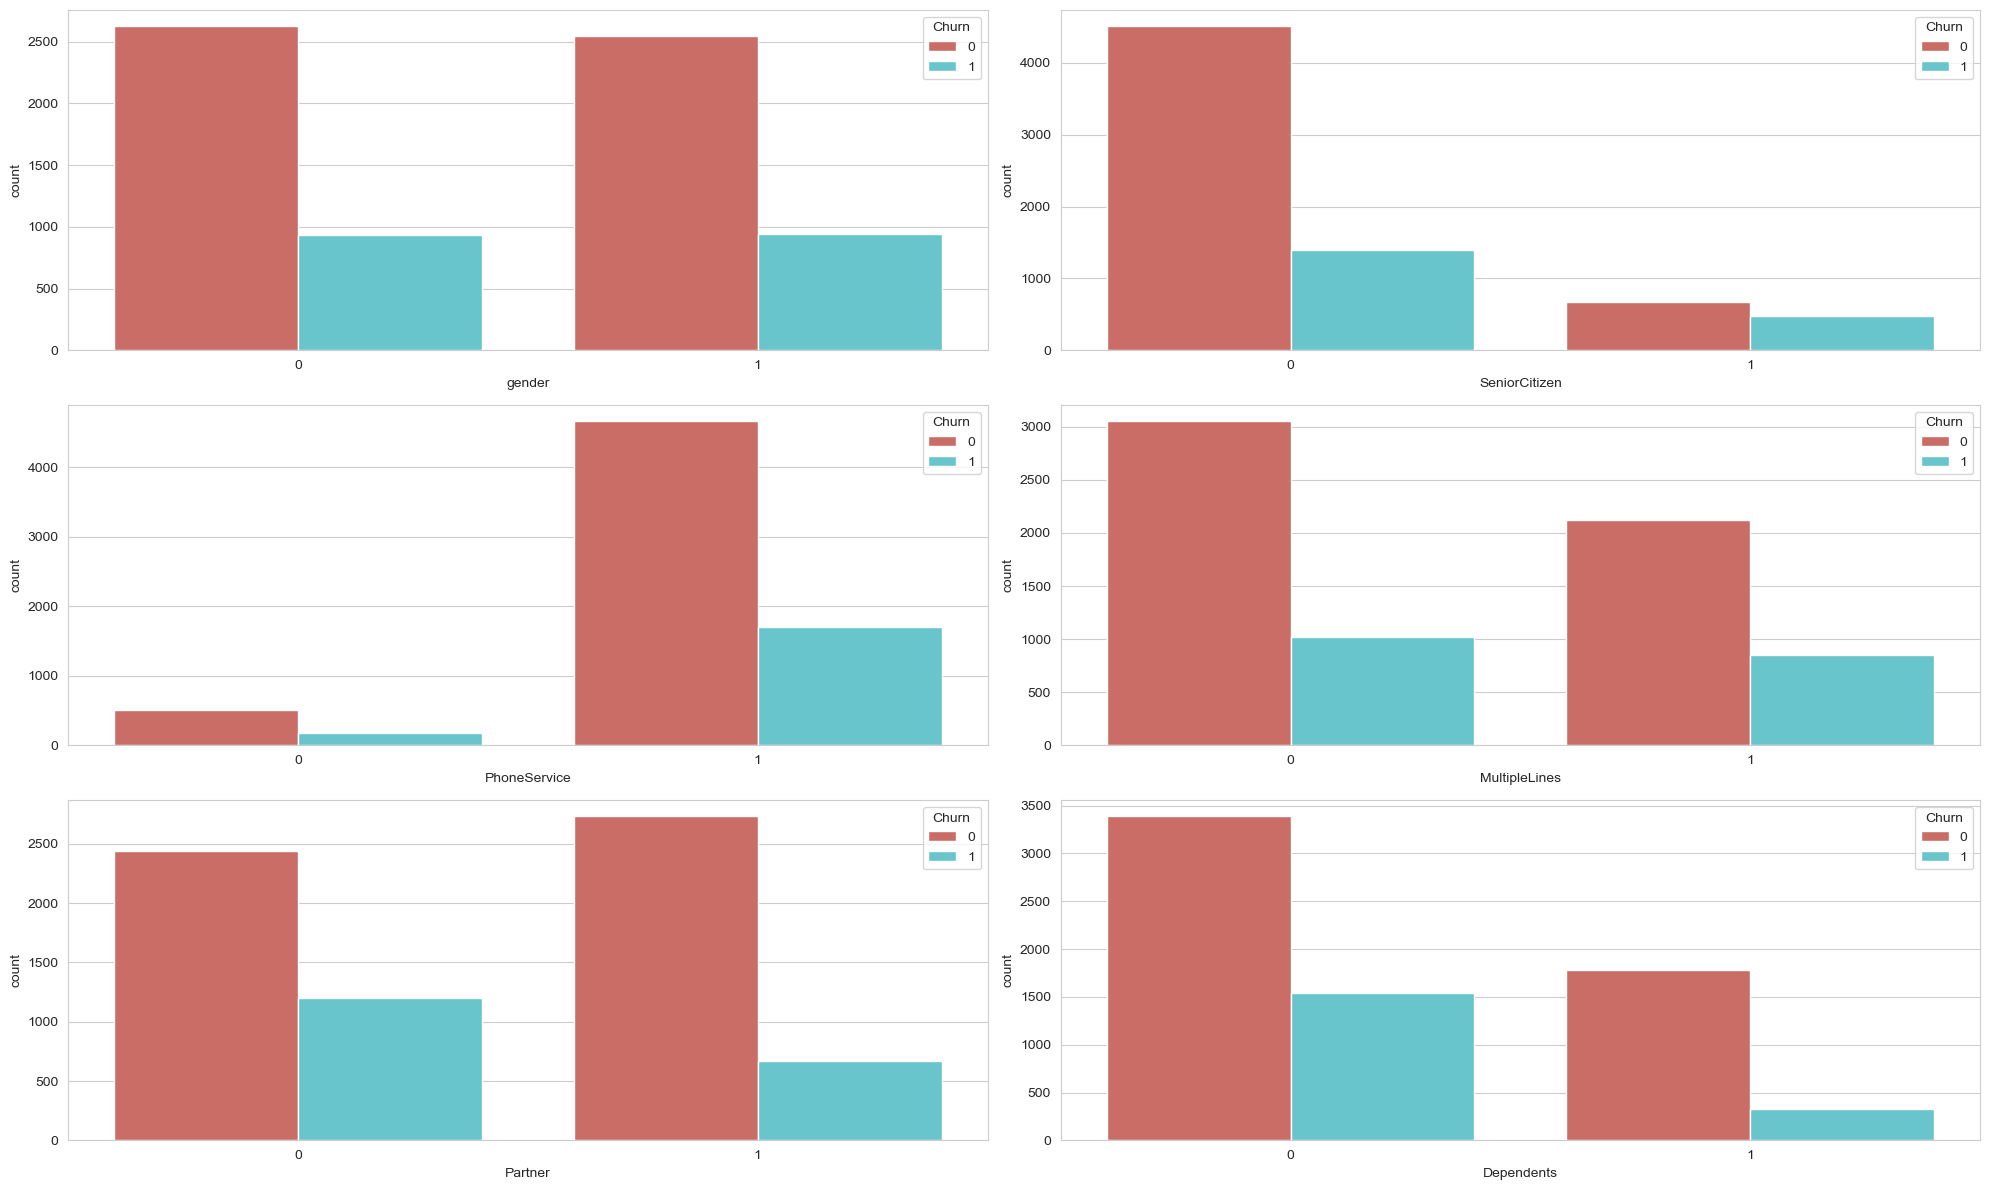

In [22]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sb.countplot(x='gender', hue = 'Churn',data = df, palette='hls',ax=axarr[0][0])
sb.countplot(x='SeniorCitizen', hue = 'Churn',data = df, palette='hls', ax=axarr[0][1])
sb.countplot(x='PhoneService', hue = 'Churn',data = df, palette='hls', ax=axarr[1][0])
sb.countplot(x='MultipleLines', hue = 'Churn',data = df, palette='hls', ax=axarr[1][1])
sb.countplot(x='Partner', hue = 'Churn',data = df,palette='hls', ax=axarr[2][0])
sb.countplot(x='Dependents', hue = 'Churn',data = df,palette='hls', ax=axarr[2][1])
plt.tight_layout()
plt.show();

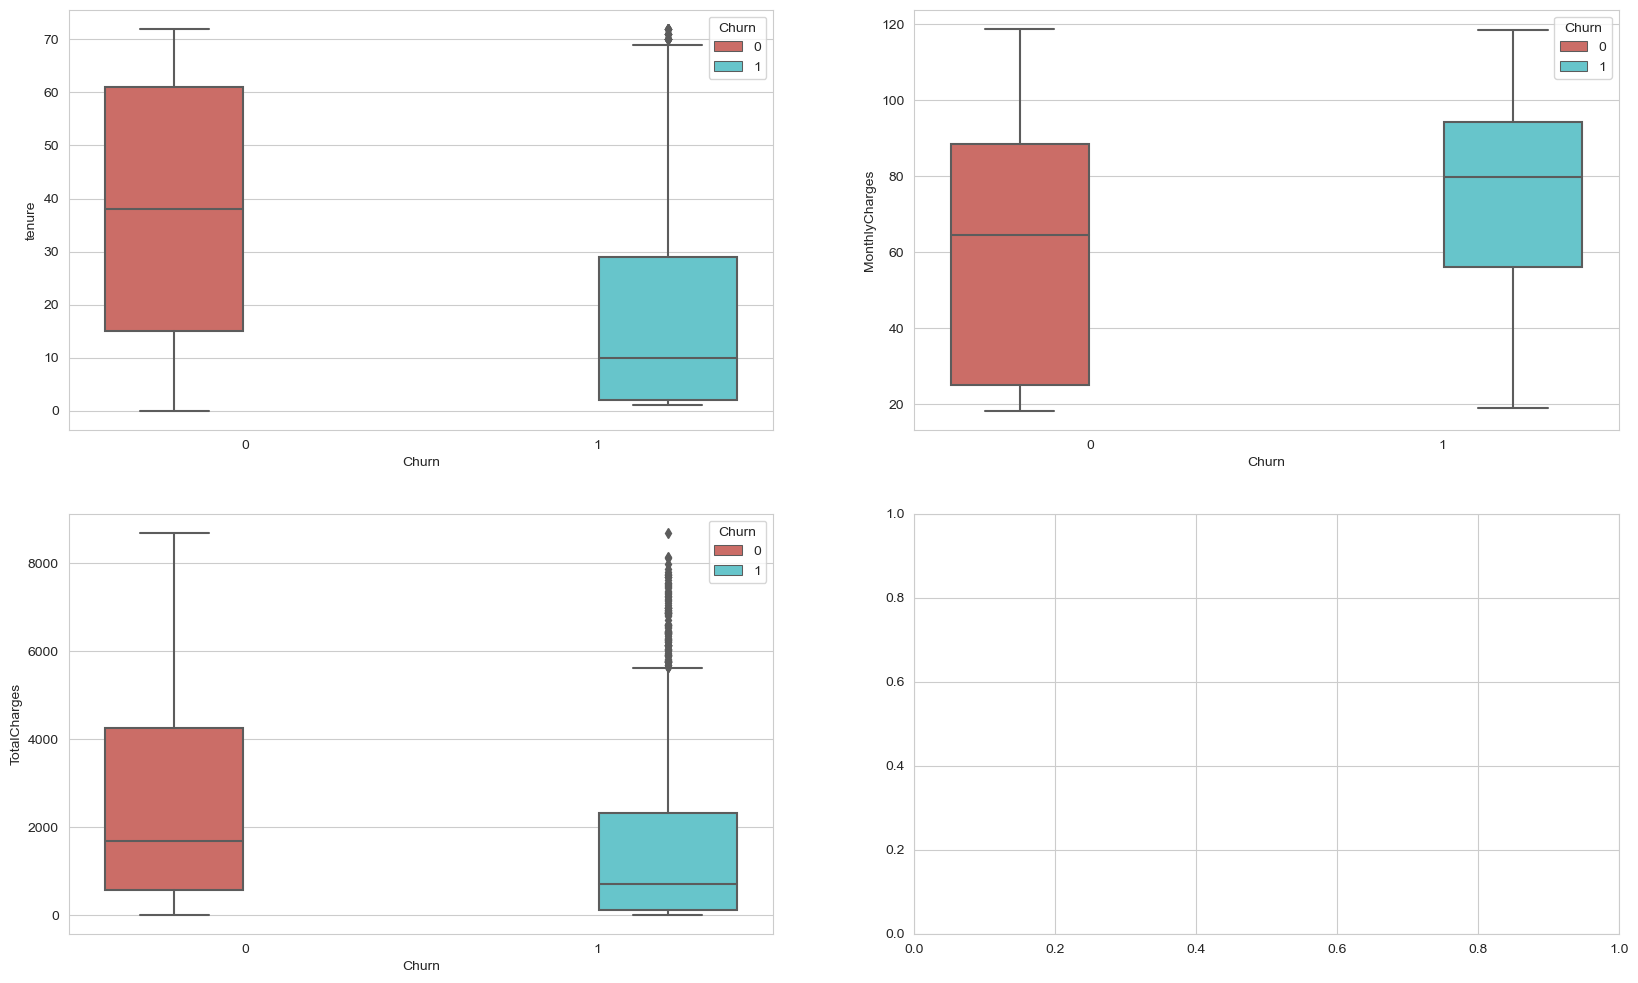

In [70]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sb.boxplot(y='tenure',x = 'Churn', hue = 'Churn',data = df,palette='hls', ax=axarr[0][0])
sb.boxplot(y='MonthlyCharges',x = 'Churn', hue = 'Churn',data = df , palette='hls', ax=axarr[0][1])
sb.boxplot(y='TotalCharges',x = 'Churn', hue = 'Churn',data = df, palette='hls', ax=axarr[1][0])
plt.show();

Finally on visualisation let us create a scatter plot and see what our data look like before we begin using our classifiers



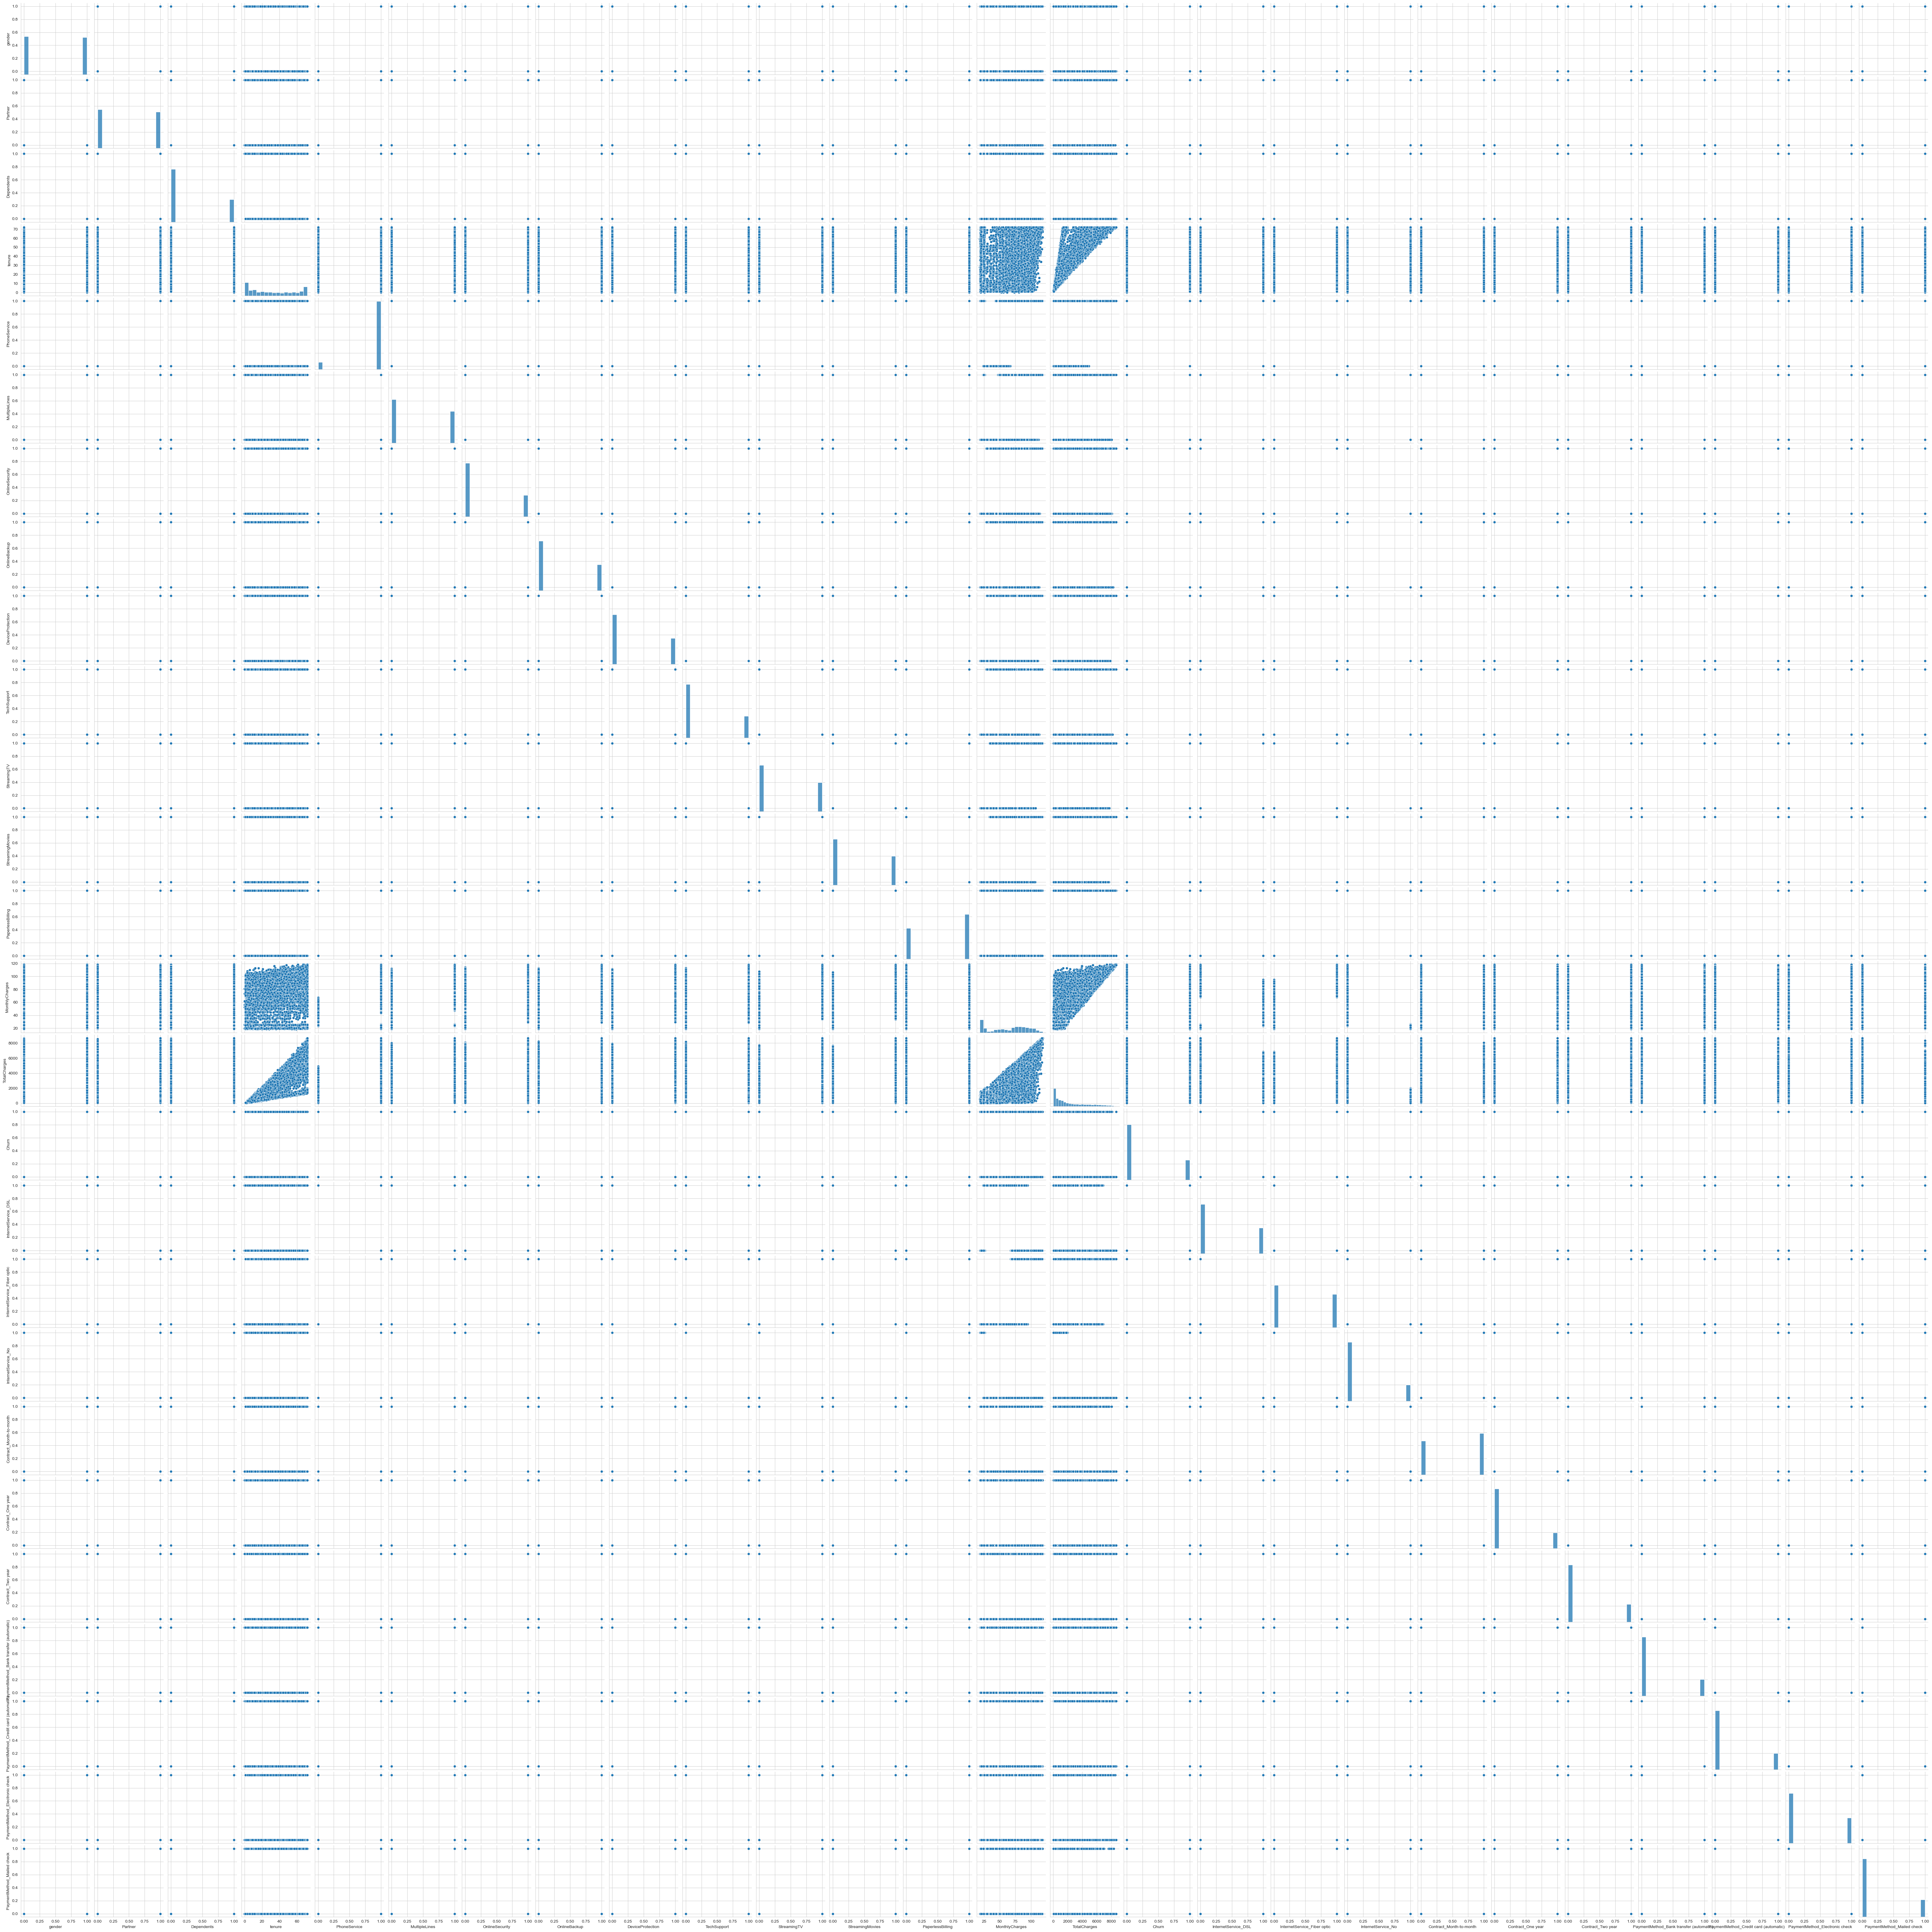

In [23]:
sb.pairplot(df)

Now we can start making up our mind on what models to use now we know what our data looks like. We can start making the decisions on which model which can help predict the model.

### Correlation heatmap to determine potential predictors

<AxesSubplot:>

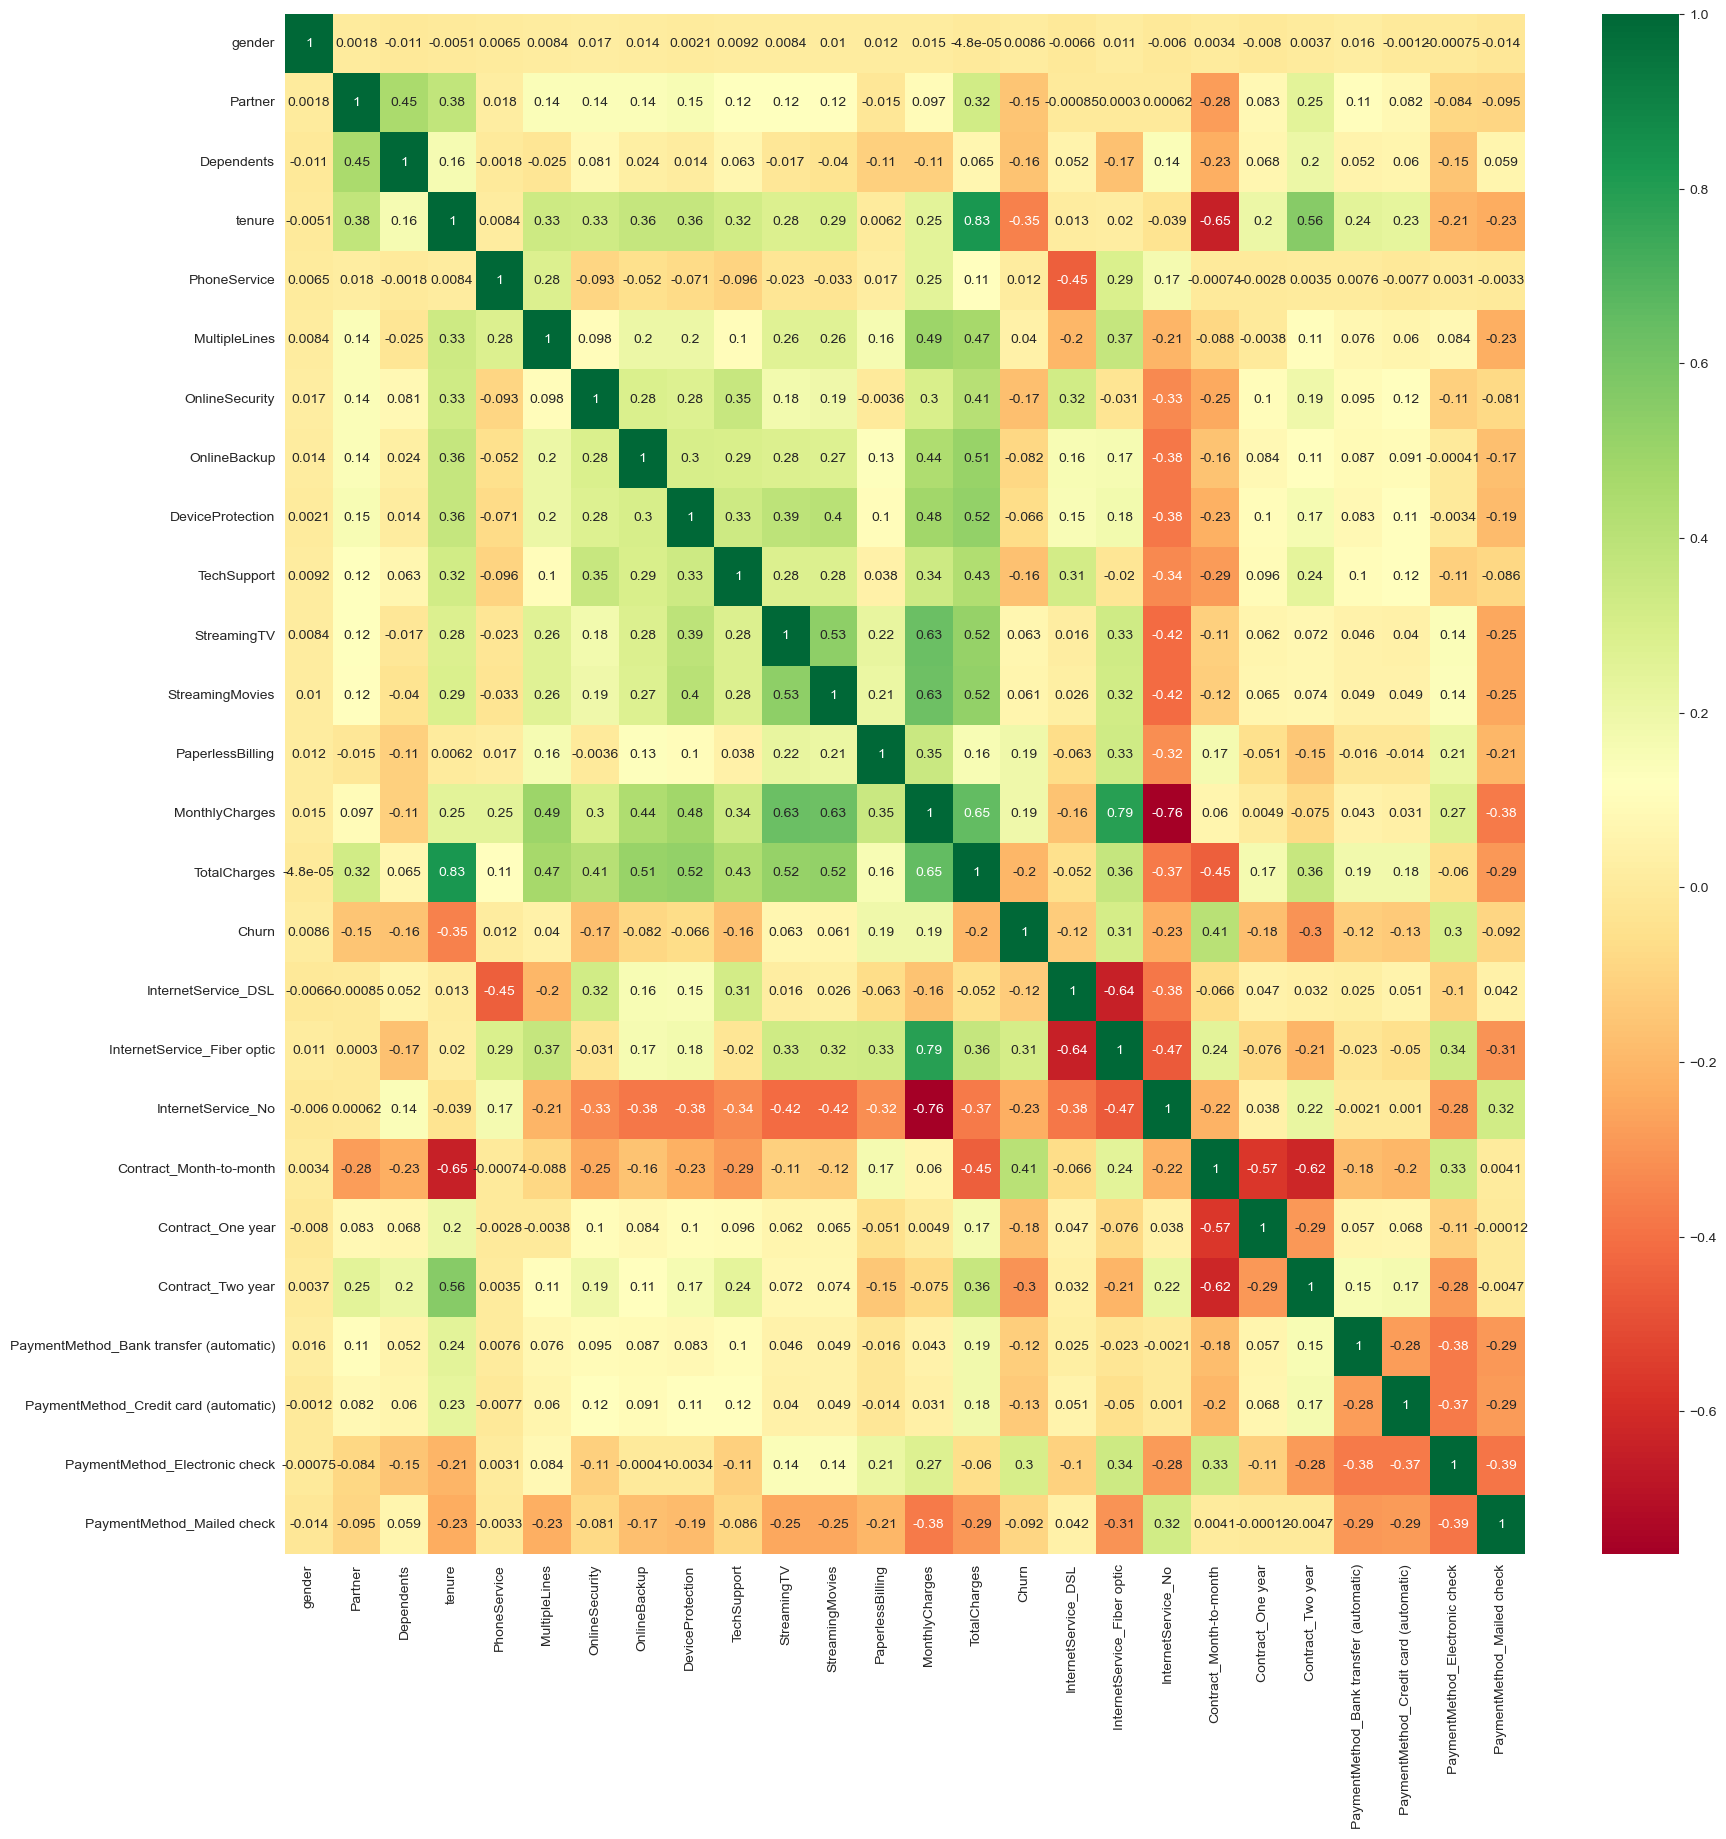

In [23]:
# Plotting The Correlations between all the features
corr_matrix = df.corr()
top_features = corr_matrix.index
plt.figure(figsize=(20,20))
sb.heatmap(df[top_features].corr(), annot=True, cmap='RdYlGn')

# Scaling the data before splitting it

In [30]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [32]:
#scaling the three columns which have values above 1
scale_cols = ['MonthlyCharges','TotalCharges','tenure']
scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

#printing the new scaled dataframe
for col in df:
    print(f'{col}: {df[col].unique()}')


gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.01388889 0.47222224 0.02777778 0.625      0.11111111 0.30555555
 0.1388889  0.3888889  0.8611111  0.18055555 0.22222222 0.8055556
 0.6805556  0.34722224 0.9583333  0.7222222  0.9861111  0.29166666
 0.16666667 0.41666666 0.6527778  1.         0.23611112 0.375
 0.06944445 0.6388889  0.15277778 0.9722222  0.875      0.5972222
 0.20833333 0.8333333  0.25       0.9166667  0.125      0.04166667
 0.43055555 0.6944445  0.8888889  0.7777778  0.09722222 0.5833333
 0.4861111  0.6666667  0.4027778  0.9027778  0.5277778  0.9444445
 0.44444445 0.7638889  0.5138889  0.5        0.5694445  0.08333334
 0.05555556 0.45833334 0.9305556  0.31944445 0.7916667  0.8472222
 0.19444445 0.2777778  0.7361111  0.5555556  0.8194445  0.33333334
 0.6111111  0.2638889  0.75       0.7083333  0.3611111  0.
 0.5416667 ]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]